# Extracción de datos web

## Índice
1. [Navegador web en Python (socket)](#socket)
2. [Recepción de páginas web con urllib](#urllib)
3. [Parsing de HTML mediante BeatifulSoup](#bea)
4. [Ejemplos de web scraping](#ejemplos)
5. [Web scraping con selenium](#sele)

<a id="socket"></a>
## Navegador web en Python (socket)

Vamos a crear nuestro primer navegador web utilizando el protocolo HTTP, realizando una conexión a un servidor web siguiendo las reglas de este protocolo para solicitar un documento y mostrar lo que el servidor nos devuelve. El documento al que accederemos se encuentra en la página web https://www.w3.org/Graphics/GIF/spec-gif89a.txt

In [1]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('www.w3.org', 80))
cmd = 'GET https://www.w3.org/Graphics/GIF/spec-gif89a.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()

HTTP/1.1 200 OK
date: Wed, 26 Oct 2022 16:52:18 GMT
last-modified: Tue, 17 Jan 1995 22:26:07 GMT
etag: "1443b-2ced90c89bdc0"
accept-ranges: bytes
content-length: 83003
cache-control: max-age=21600
expires: Wed, 26 Oct 2022 22:52:18 GMT
vary: Accept-Encoding,upgrade-insecure-requests
keep-alive: timeout=5, max=2000
content-type: text/plain
x-backend: www-mirrors
x-request-id: 635965c2842d9417
connection: close





    Cover Sheet for the GIF89a Specification


    DEFERRED CLEAR CODE IN LZW COMPRESSION

    There has been confusion about where clear codes can be found in the
    data stream.  As the specification says, they may appear at anytime.  There
    is not a requirement to send a clear code when the string table is full.

    It is the encoder's decision as to when the table should be cleared.  When
    the table is full, the encoder can chose to use the table as is, making no
    changes to it until the encoder chooses to clear it.  The encoder during
    this time sends out c

      <Packed Fields>  =     Reserved                      3 Bits
                             Disposal Method               3 Bits
                             User Input Flag               1 Bit
                             Transparent Color Flag        1 Bit

            i) Extension Introducer - Identifies the beginning of an extension







                                                                        16


            block. This field contains the fixed value 0x21.

            ii) Graphic Control Label - Identifies the current block as a
            Graphic Control Extension. This field contains the fixed value
            0xF9.

            iii) Block Size - Number of bytes in the block, after the Block
            Size field and up to but not including the Block Terminator.  This
            field contains the fixed value 4.

            iv) Disposal Method - Indicates the way in which the graphic is to
            be treated after being displayed.

            Valu

Primero, el programa realiza una conexión al puerto 80 del servidor www.w3.org. Como nuestro programa está asumiendo el rol de "navegador web", el protocolo HTTP nos dice que tenemos que enviar el comando GET seguido por una línea en blanco. `\r\n` significa un final de línea, y `\r\n\r\n` es el equivalente a la línea en blanco.

<a id="urllib"></a>
## Recepción de páginas web con urllib

In [3]:
import urllib.request
f = urllib.request.urlopen('https://www.w3.org/Graphics/GIF/spec-gif89a.txt')
print(f.read().decode())





    Cover Sheet for the GIF89a Specification


    DEFERRED CLEAR CODE IN LZW COMPRESSION

    There has been confusion about where clear codes can be found in the
    data stream.  As the specification says, they may appear at anytime.  There
    is not a requirement to send a clear code when the string table is full.

    It is the encoder's decision as to when the table should be cleared.  When
    the table is full, the encoder can chose to use the table as is, making no
    changes to it until the encoder chooses to clear it.  The encoder during
    this time sends out codes that are of the maximum Code Size.

    As we can see from the above, when the decoder's table is full, it must
    not change the table until a clear code is received.  The Code Size is that
    of the maximum Code Size.  Processing other than this is done normally.

    Because of a large base of decoders that do not handle the decompression in
    this manner, we ask developers of GIF encoding software 

In [4]:
f = urllib.request.urlopen('https://www.thebridge.tech')
print(f.read().decode())

<!DOCTYPE html><!-- Last Published: Wed Oct 26 2022 14:35:38 GMT+0000 (Coordinated Universal Time) --><html data-wf-domain="www.thebridge.tech" data-wf-page="6336cf7720a00a19f58a80fe" data-wf-site="60780bff57ddc42a6adc1d7e" lang="es"><head><meta charset="utf-8"/><title>The Bridge | Digital Talent Accelerator</title><meta content="Da un giro a tu carrera con The Bridge: bootcamps para aprender programación, diseño o análisis de datos. Tu pasión por aprender es nuestro motor." name="description"/><meta content="The Bridge | Digital Talent Accelerator" property="og:title"/><meta content="Da un giro a tu carrera con The Bridge: bootcamps para aprender programación, diseño o análisis de datos. Tu pasión por aprender es nuestro motor." property="og:description"/><meta content="The Bridge | Digital Talent Accelerator" property="twitter:title"/><meta content="Da un giro a tu carrera con The Bridge: bootcamps para aprender programación, diseño o análisis de datos. Tu pasión por aprender es nues

Cuando el programa se ejecuta, en su salida sólo vemos el contenido del fichero. Las cabeceras siguen enviándose, pero el código de `urllib` se queda con ella y sólo nos devuelve los datos. Una vez abierta la página web, se puede leer como si fuese un archivo local.  
¿Qué ocurre si cambiamos el txt por otra página web?

Puede ocurrir que urllib devuelva un error de fallo en la verificación del certificado SSL:  

`urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed`

SSL (*Secure Sockets Layer*) es un certificado que asegura que una página web es de confianza. 

Para ignorar la autenticación de certificado SSL no verificado en urllib tenemos dos opciones:

In [5]:
import ssl
import urllib.request
context = ssl._create_unverified_context()

f = urllib.request.urlopen('https://www.elpais.com', context=context)
print(f.read().decode())

<!DOCTYPE html><html lang="es-ES"><head><link rel="preconnect" href="//static.elpais.com"/><link rel="preconnect" href="//ep00.epimg.net"/><link rel="preconnect" href="//imagenes.elpais.com"/><link rel="preload" as="script" href="//ep00.epimg.net/js/prisa/user.min.js?i=1"/><link rel="preconnect" href="//www.googletagservices.com"/><link rel="preconnect" href="//ping.chartbeat.net"/><link rel="preconnect" href="//cdn.krxd.net"/><link rel="preconnect" href="//assets.adobedtm.com"/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Bold.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Roman.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/marcin-ant-b/marcinantb-regular-webfont.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https

In [6]:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

<a id="bea"></a>
## Parsing de HTML mediante BeatifulSoup

BeautifulSoup es una librería de Python que permite analizar documentos HTML y extraer datos de ellos, compensando imperfecciones que puedan existir. Para instalar esta librería escribimos en anaconda Prompt:  
`conda install -c anaconda beautifulsoup4`

Esta librería permite, por ejemplo, extraer los atributos href de las etiquetas de anclaje (a)  
<img src='http://www.cellbiol.com/bioinformatics_web_development/wp-content/uploads/2017/01/attributes_and_values_in_the_a_tag.png'>  
En el siguiente ejemplo, vamos a parsear una entrada HTML y extraer los links utilizando la librería BeautifulSoup. 
Utilizaremos urllib para leer la página y después BeautifulSoup para extraer los atributos href de las etiquetas de tipo ancla (a)

In [8]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://thebridge.tech'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

tags = soup('a')
for tag in tags:
    print(tag.get('href'))

/
/bootcamp/bootcamps-full-time
/bootcamps/bootcamp-ciberseguridad
/bootcamps/bootcamp-cloud-devops
/bootcamps/bootcamp-data-science
/bootcamps/bootcamp-fullstack-developer
/bootcamps/bootcamp-marketing-digital
/bootcamps/bootcamp-product-design
/bootcamp/bootcamps-part-time
/bootcamps/ciberseguridad-part-time
/bootcamps/cloud-devops-pt
/bootcamps/data-science-part-time
/bootcamps/desarrollo-web-full-stack-part-time
/bootcamps/marketing-digital-part-time
/bootcamps/ux-ui-product-design-part-time
https://www.eventbrite.es/o/the-bridge-digital-talent-accelerator-26763007783
/campus/bilbao
/campus/madrid
/campus/valencia
/campus/sevilla
/campus/online
/financiacion-becas/financiacion-becas
/financiacion-becas/income-share-agrement-isa
/empresas-intituciones/soluciones-empresas
/empresas-intituciones/servicios-universidades-instituciones-educativas
/empresas-intituciones/contrata-nuestros-graduados
/empleabilidad
/sobre-nosotros/quienes-somos
/sobre-nosotros/por-que-the-bridge
/sobre-nosot

Podemos extraer más campos de las etiquetas

In [9]:
for tag in tags:
    print('URL:', tag.get('href'))
    print('Texto:', tag.text)
    print('Atributos:', tag.attrs)
    print('\r')

URL: /
Texto: 
Atributos: {'href': '/', 'aria-current': 'page', 'class': ['brand-2', 'w-nav-brand', 'w--current']}

URL: /bootcamp/bootcamps-full-time
Texto: Bootcamps Full Time
Atributos: {'href': '/bootcamp/bootcamps-full-time', 'class': ['link']}

URL: /bootcamps/bootcamp-ciberseguridad
Texto: Ciberseguridad
Atributos: {'href': '/bootcamps/bootcamp-ciberseguridad', 'class': ['link-header', 'link-header-hover']}

URL: /bootcamps/bootcamp-cloud-devops
Texto: Cloud & DevOps
Atributos: {'href': '/bootcamps/bootcamp-cloud-devops', 'class': ['link-header', 'link-header-hover']}

URL: /bootcamps/bootcamp-data-science
Texto: Data Science
Atributos: {'href': '/bootcamps/bootcamp-data-science', 'class': ['link-header', 'link-header-hover']}

URL: /bootcamps/bootcamp-fullstack-developer
Texto: Desarrollo Web Full Stack
Atributos: {'href': '/bootcamps/bootcamp-fullstack-developer', 'class': ['link-header', 'link-header-hover']}

URL: /bootcamps/bootcamp-marketing-digital
Texto: Marketing Digita

Puedes encontrar la documentación de beautifulsoup en https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<a id="ejemplos"></a>
## Ejemplos de web scraping

### 1. Frecuencia de las palabras de un discurso  
Vamos a obtener la frecuencia de las palabras del siguiente discurso: https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [14]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html'

html = urllib.request.urlopen(url)
soup2 = BeautifulSoup(html)

tags = soup2('p')

discurso = ''
for tag in tags:
    if len(tag.attrs) == 1 and 'Traducción de New Clips' not in tag.text:
        discurso+=tag.text

In [15]:
discurso

'Señor presidente de la Cámara de Representantes, señor vicepresidente, miembros del Congreso, primera dama de Estados Unidos, compatriotas estadounidenses:Ha transcurrido menos de un año desde que subí por primera vez a la tribuna de esta solemne cámara para hablar en nombre del pueblo estadounidense y referirme a sus preocupaciones, sus esperanzas y sus sueños. Aquella noche, nuestro Gobierno ya había tomado medidas inmediatas. Una nueva oleada de optimismo recorría el país.Desde entonces no ha habido día en que no hayamos seguido adelante con una visión clara y una misión justa: volver a hacer Estados Unidos grande para todos los estadounidenses.A lo largo de este último año, hemos realizado avances increíbles y hemos obtenido resultados extraordinarios. Hemos hecho frente a retos que preveíamos y a otros que jamás habríamos podido imaginar. Hemos compartido las más altas cotas de la victoria y el dolor de la adversidad. Hemos resistido inundaciones, incendios y tormentas. Pero en t

In [22]:
contadores = {}
discurso = discurso.replace(',','')\
                   .replace('.','')\
                   .replace(':','')\
                   .replace('?','')\
                   .replace('"','')
palabras = discurso.lower().replace('estados unidos','EEUU').split()
palabras

['señor',
 'presidente',
 'de',
 'la',
 'cámara',
 'de',
 'representantes',
 'señor',
 'vicepresidente',
 'miembros',
 'del',
 'congreso',
 'primera',
 'dama',
 'de',
 'EEUU',
 'compatriotas',
 'estadounidensesha',
 'transcurrido',
 'menos',
 'de',
 'un',
 'año',
 'desde',
 'que',
 'subí',
 'por',
 'primera',
 'vez',
 'a',
 'la',
 'tribuna',
 'de',
 'esta',
 'solemne',
 'cámara',
 'para',
 'hablar',
 'en',
 'nombre',
 'del',
 'pueblo',
 'estadounidense',
 'y',
 'referirme',
 'a',
 'sus',
 'preocupaciones',
 'sus',
 'esperanzas',
 'y',
 'sus',
 'sueños',
 'aquella',
 'noche',
 'nuestro',
 'gobierno',
 'ya',
 'había',
 'tomado',
 'medidas',
 'inmediatas',
 'una',
 'nueva',
 'oleada',
 'de',
 'optimismo',
 'recorría',
 'el',
 'paísdesde',
 'entonces',
 'no',
 'ha',
 'habido',
 'día',
 'en',
 'que',
 'no',
 'hayamos',
 'seguido',
 'adelante',
 'con',
 'una',
 'visión',
 'clara',
 'y',
 'una',
 'misión',
 'justa',
 'volver',
 'a',
 'hacer',
 'EEUU',
 'grande',
 'para',
 'todos',
 'los',
 'e

In [23]:
for palabra in palabras:
    if len(palabra)>3 and palabra not in ['esta','para', 'este', 'estos', 'esos']:
        contadores[palabra] = contadores.get(palabra,0) + 1

In [24]:
import pandas as pd
df = pd.DataFrame(list(contadores.items()), columns = ['palabra','contador'])
df.sort_values('contador',ascending=False)

,palabra,contador
96,estadounidenses,28
28,nuestro,27
569,nuestros,27
567,nuestra,25
125,como,24
...,...,...
787,ordenado,1
786,pagamos,1
784,cuestan,1
782,receta,1


### 2. Web Scraping de coinmarketcap
Extraemos el valor más reciente de Bitcoin en https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin

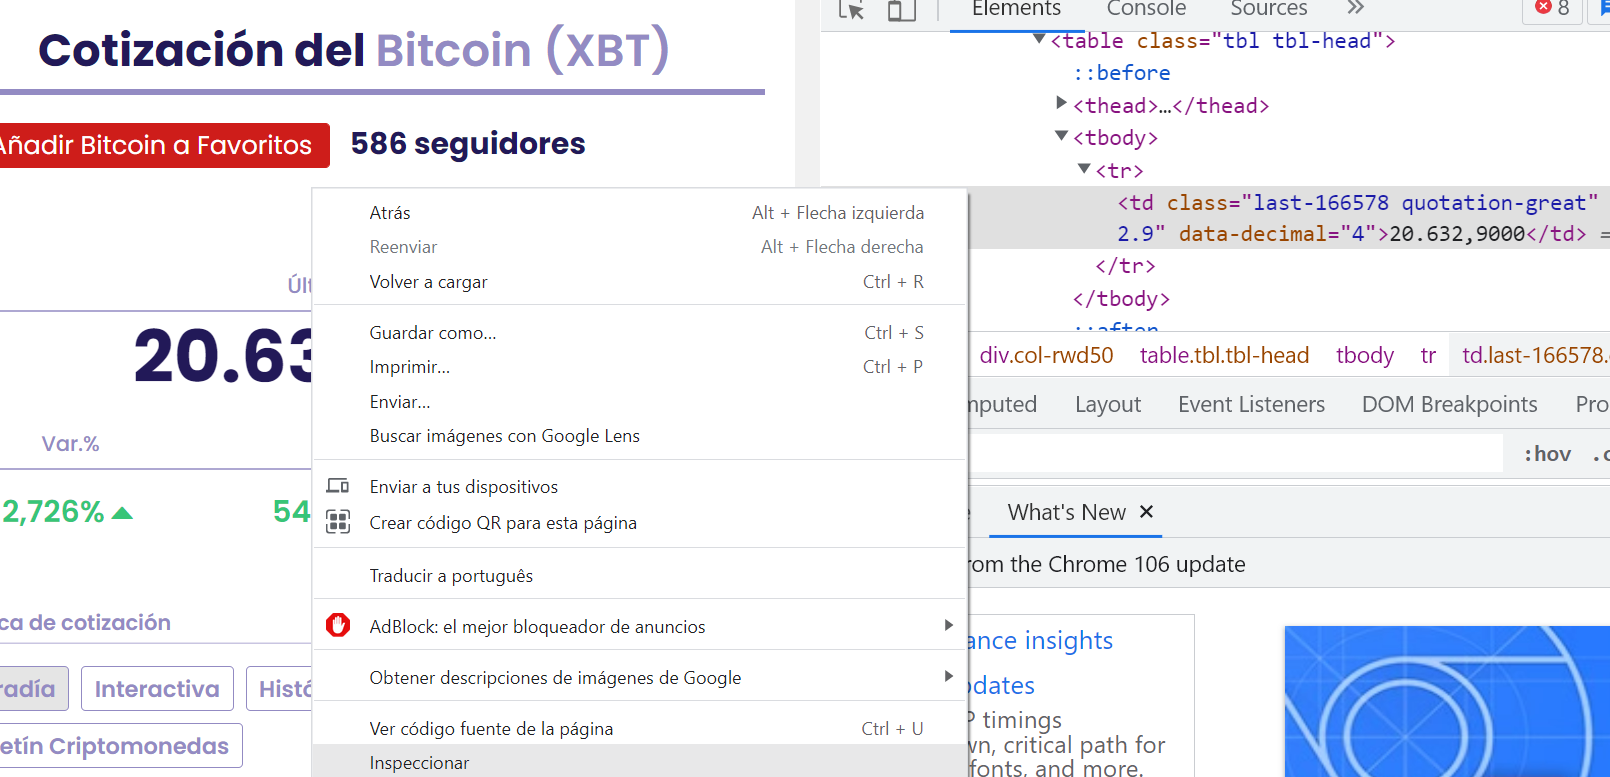

In [11]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin'
html = urllib.request.urlopen(url)
soup3 = BeautifulSoup(html)

tags = soup3.find_all('td', class_='last-166578 quotation-great')

# Como class es una palabra reservada, para coger el atributo le añado una barra baja "_"

print(tags) # Tags es una lista
# En este caso solo tiene un elemento, pero al ser una lista tengo que acceder por el indice
float(tags[0].text.replace('.','').replace(',','.'))

[<td class="last-166578 quotation-great" data-decimal="4" data-value="20578.1">20.578,1000</td>]


20578.1

In [38]:
tags2 = soup3.find_all('div', class_='varPerc-166578')
print(tags2[0].text.replace('%','').replace('.','').replace(',','.'))


3.823 


### 3. Web scraping con pandas 

La función `read_html()` de pandas también permite extraer tablas de páginas web, devolviendo una lista de dataframes con todas las tablas que existan.  
Por ejemplo, vamos a hacer scraping de la siguiente tabla: https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/

Es necesario instalar la librería `lxml`: `conda install -c conda-forge lxml`

In [1]:
import pandas as pd

url = 'https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/'

tablas = pd.read_html(url)
tablas[0]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


### 4. Agente de usuario

El **agente de usuario** es un identificador con el que un programa inicia sesión en el servidor web para solicitar datos

Cuando un usuario accede a una página web, la aplicación generalmente envía una cadena de texto que identifica al agente de usuario ante el servidor. Este texto forma parte de la petición a través de HTTP, llevando como prefijo
*User-Agent*, y generalmente incluye información como el nombre de la aplicación, la versión, el sistema operativo, y el idioma. 

La identificación de agente de usuario es uno de los criterios de exclusión utilizado para impedir el acceso a ciertas secciones de un sitio web.

Ejemplo: Obtenemos la altura de los futbolistas desde la web de transfermarkt:  
https://www.transfermarkt.es/lionel-messi/profil/spieler/28003


In [4]:
import urllib.request
from bs4 import BeautifulSoup
url = 'https://www.transfermarkt.es/lionel-messi/profil/spieler/28003'
req = urllib.request.Request(
    url, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
)

f = urllib.request.urlopen(req)

soup4 = BeautifulSoup(f)

tags3 = soup4.find_all(attrs={'itemprop':'height'})

print(tags3)

altura = float(tags3[0].text.replace('m','').replace(',','.'))

altura

[<span class="data-header__content" itemprop="height">1,70 m</span>]


1.7

## <span style="color:red">Do it yourself</span>

Obtén los equipos que hayan ganado LaLiga en los últimos 4 años con su puntuación a partir de la siguiente URL: https://resultados.as.com/resultados/futbol/primera/2021_2022/clasificacion/  

| Temporada | Club        | Puntos |
|-----------|-------------|--------|
| 19/20     | Real Madrid | 87     |
| 18/19     | Barcelona   | 87     |
| ...       | ...         | ...    |

In [5]:
import pandas as pd

año1 = 21
año2 = 22
url = 'https://resultados.as.com/resultados/futbol/primera/20'+str(año1)+'_20'+str(año2)+'/clasificacion/'

tablas = pd.read_html(url)

In [6]:
len(tablas)

3

In [7]:
tablas[0]

Unnamed: 0_level_0 Total                         En casa      ...         \
              Equipo  Pts.  PJ  PG  PE  PP  GF  GC    Pts.  PJ  ... PP  GF   
0     1  Real Madrid    86  38  26   8   4  80  31      44  19  ...  1  44   
1       2  Barcelona    73  38  21  10   7  68  38      38  19  ...  5  37   
2        3  Atlético    71  38  21   8   9  65  43      41  19  ...  2  33   
3         4  Sevilla    70  38  18  16   4  53  30      42  19  ...  1  36   
4           5  Betis    65  38  19   8  11  62  40      32  19  ...  7  34   
5     6  R. Sociedad    62  38  17  11  10  40  37      35  19  ...  4  16   
6      7  Villarreal    59  38  16  11  11  63  37      36  19  ...  3  40   
7     18  Granada  2    38  38   8  14  16  44  61      22  19  ...  7  22   
8        19  Levante    35  38   8  11  19  51  76      22  19  ...  7  28   
9         20  Alavés    31  38   8   7  23  31  65      25  19  ...  8  17   

      Fuera                          
   GC  Pts.  PJ  PG  PE  PP  GF  GC  
0  13    42  19  13   3   3  36  18  
1  19    35  19   9   8   2  31  19  
2  16    30  19   9   3   7  32  27  
3  17    28  19   6  10   3  17  13  
4  22    33  19   9   6   4  28  18  
5   9    27  19   7   6   6  24  28  
6  18    23  19   6   5   8  23  19  
7  29    16  19   3   7   9  22  32  
8  30    13  19   3   4  12  23  46  
9  21     6  19   1   3  15  14  44  

[10 rows x 22 columns]

In [13]:
table = tablas[0]

equipo = table.iloc[0,0].replace('1','').strip()
# con strip elimino espacios a izquierda y derecha
print(equipo)
puntos = table.iloc[0,1]

df_temp = pd.DataFrame({'Temporada':['21/22'],
                        'Equipo':[equipo]
                        'Puntos':[puntos]
                       })


Real Madrid


86

In [16]:
df = pd.DataFrame()
for temp in range(18,22):
    temporada = '20'+str(temp)+'_'+'20'+str(temp+1)
    url = 'https://resultados.as.com/resultados/futbol/primera/'+str(temporada)+'/clasificacion/'
    tablas = pd.read_html(url)
    table = tablas[0]
    equipo = table.iloc[0,0].replace('1','').strip()
    puntos = table.iloc[0,1]

    df_temp = pd.DataFrame({'Temporada':['21/22'],
                            'Equipo':[equipo],
                            'Puntos':[puntos]
                           })
    df = pd.concat([df,df_temp], axis=0)
    
df.reset_index(drop=True)

,Temporada,Equipo,Puntos
0,21/22,Barcelona,87
1,21/22,Real Madrid,87
2,21/22,Atlético,86
3,21/22,Real Madrid,86


## <span style="color:red">Do it yourself</span>
Extrae el precio de la leche Pascual entera de 1L en Carrefour

In [28]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://www.carrefour.es/supermercado/leche-entera-pascual-brik-1-l/R-521006986/p'

req = urllib.request.Request(url)

f2 = urllib.request.urlopen(req)

soup5 = BeautifulSoup(f2)
tags4 = soup5.find_all('span', class_='buybox__price')
precio = float(tags4[0].text.replace(' €','').replace(',','.'))
precio

1.19

Intenta extraer el precio de alguno de estos productos: https://tienda.mercadona.es/search-results?query=leche%20entera

In [17]:
url = "https://tienda.mercadona.es/search-results?query=leche%20entera"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)
tags = soup.find_all("p", class_= "product-price__unit-price subhead1-b")
tags

#Esto no da nada porque no siempre se pude coger los datos, en este caso está buscnaado en el buscador propio, no en el producto
#Por eso no se puede buscar, porque no es un código html fijo (el del buscador)

<a id="sele"></a>
## Web Scraping con Selenium

Selenium es una librería que permite automatizar navegadores web

Documentación: https://selenium-python.readthedocs.io/

Instalar librerías `selenium` y `webdriver_manager`

In [29]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import time

In [30]:
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.29M/6.29M [00:00<00:00, 13.3MB/s]
C:\Users\Victor\AppData\Local\Temp\ipykernel_14508\2786177129.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())


### Ejemplo 1: Introducir una búsqueda en la web de carrefour y extraer el precio de los productos

In [31]:
#Primero se accede a la web
driver.get("https://www.carrefour.es")
#Esto abre en el driver la web. No hay que interactuar con la web en el driver, hay que hacerlo todo en python
#Si que se puede usar para inspeccionar.

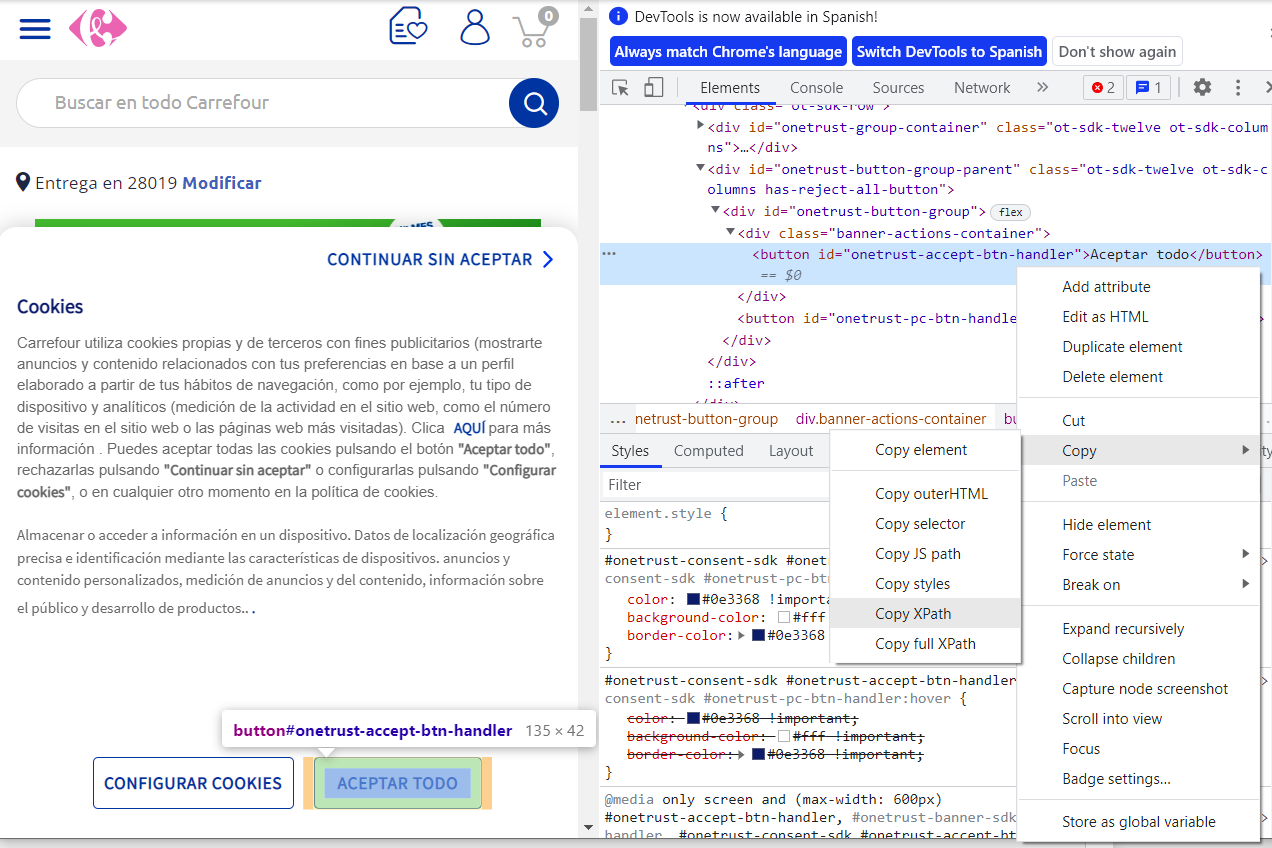

In [32]:
#Aceptar cookies
#Se pega el Xpath copiado para LOCALIZAR el botón. Para hacer clic se pone .click()
driver.find_element("xpath", '//*[@id="onetrust-accept-btn-handler"]').click()

In [33]:
#Buscar producto, pero primero hay que entrar en el buscador
driver.find_element("xpath", '//*[@id="search-input"]').click()

In [34]:
#Se busca el producto en el buscador escribiendo con send_keys()
driver.find_element("xpath", '//*[@id="empathy-x"]/header/div/div/input[3]').send_keys("Leche Pascual")

In [35]:
#Extraer el HTML
html = driver.page_source

In [36]:
#Una vez ya con el HTML bien, se puede ya trabajar con BeautifulSoup
soup = BeautifulSoup(html)
productos = soup.find_all("h1", class_="ebx-result-title ebx-result__title")
productos

[<h1 class="ebx-result-title ebx-result__title">Leche entera Pascual brik 1 l.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche semidesnatada Pascual brik 1 l.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche desnatada Pascual sin lactosa brik 1 l.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche entera Pascual botella 1,5 l.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche desnatada 0% MG Pascual botella 1,5 l.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche semidesnatada Pascual sin lactosa brik 1 l.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche semidesnatada con calcio Pascual brik 1 l.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche entera Pascual pack de 6 briks de 200 ml.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche semidesnatada Salud Pascual brik 1 l.</h1>,
 <h1 class="ebx-result-title ebx-result__title">Leche semidesnatada Pascual botella 1,5 l.</h1>,
 <h1 class="ebx-result-title e

In [37]:
#Para sacar el nombre de cada producto y guardarlo en una lista

lista_productos = []
for producto in productos:
    lista_productos.append(producto.text)
lista_productos

['Leche entera Pascual brik 1 l.',
 'Leche semidesnatada Pascual brik 1 l.',
 'Leche desnatada Pascual sin lactosa brik 1 l.',
 'Leche entera Pascual botella 1,5 l.',
 'Leche desnatada 0% MG Pascual botella 1,5 l.',
 'Leche semidesnatada Pascual sin lactosa brik 1 l.',
 'Leche semidesnatada con calcio Pascual brik 1 l.',
 'Leche entera Pascual pack de 6 briks de 200 ml.',
 'Leche semidesnatada Salud Pascual brik 1 l.',
 'Leche semidesnatada Pascual botella 1,5 l.',
 'Leche entera Salud Pascual brik 1 l.',
 'Leche entera con calcio Pascual brik 1 l.',
 'Leche semidesnatada Pascual sin lactosa pack de 3 briks de 200 ml.',
 'Leche desnatada 0% MG con calcio Pascual brik 1 l.']

In [38]:
#Ahora con los precios
soup = BeautifulSoup(html)
precios = soup.find_all("strong", class_="ebx-result-price__value")
lista_precios= []

for precio in precios:
    lista_precios.append(precio.text)
    
lista_precios  

['1,19 €',
 '1,19 €',
 '1,49 €',
 '1,79 €',
 '1,79 €',
 '1,49 €',
 '1,59 €',
 '2,59 €',
 '1,49 €',
 '1,79 €',
 '1,49 €',
 '1,59 €',
 '1,45 €',
 '1,59 €']

In [40]:
import pandas as pd

df = pd.DataFrame({"Producto": lista_productos, 
                 "Precio": lista_precios})
df

,Producto,Precio
0,Leche entera Pascual brik 1 l.,"1,19 €"
1,Leche semidesnatada Pascual brik 1 l.,"1,19 €"
2,Leche desnatada Pascual sin lactosa brik 1 l.,"1,49 €"
3,"Leche entera Pascual botella 1,5 l.","1,79 €"
4,"Leche desnatada 0% MG Pascual botella 1,5 l.","1,79 €"
5,Leche semidesnatada Pascual sin lactosa brik 1 l.,"1,49 €"
6,Leche semidesnatada con calcio Pascual brik 1 l.,"1,59 €"
7,Leche entera Pascual pack de 6 briks de 200 ml.,"2,59 €"
8,Leche semidesnatada Salud Pascual brik 1 l.,"1,49 €"
9,"Leche semidesnatada Pascual botella 1,5 l.","1,79 €"


In [41]:
#Es interesante para este tipo de tablas de precios, incluir las fechas
from datetime import datetime

fecha_hoy = datetime.today().strftime("%Y-%m-%d") #el formato es buscar en google como se escriben las fechas en esta libreria

#Como todas las columnas tienen que tener el mismo tamaño, hay que repetir la fecha
df = pd.DataFrame({"Fecha":[fecha_hoy]*len(lista_precios),
                 "Producto": lista_productos, 
                 "Precio": lista_precios})
df

,Fecha,Producto,Precio
0,2022-10-27,Leche entera Pascual brik 1 l.,"1,19 €"
1,2022-10-27,Leche semidesnatada Pascual brik 1 l.,"1,19 €"
2,2022-10-27,Leche desnatada Pascual sin lactosa brik 1 l.,"1,49 €"
3,2022-10-27,"Leche entera Pascual botella 1,5 l.","1,79 €"
4,2022-10-27,"Leche desnatada 0% MG Pascual botella 1,5 l.","1,79 €"
5,2022-10-27,Leche semidesnatada Pascual sin lactosa brik 1 l.,"1,49 €"
6,2022-10-27,Leche semidesnatada con calcio Pascual brik 1 l.,"1,59 €"
7,2022-10-27,Leche entera Pascual pack de 6 briks de 200 ml.,"2,59 €"
8,2022-10-27,Leche semidesnatada Salud Pascual brik 1 l.,"1,49 €"
9,2022-10-27,"Leche semidesnatada Pascual botella 1,5 l.","1,79 €"


In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import time

In [5]:
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.29M/6.29M [00:00<00:00, 28.7MB/s]
C:\Users\Victor\AppData\Local\Temp\ipykernel_23880\2786177129.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())


In [6]:
driver.get("https://tienda.mercadona.es")

In [7]:
driver.find_element("xpath", '//*[@id="root"]/div[1]/div/div/button[2]').click()

In [9]:
driver.find_element("xpath", '//*[@id="root"]/div[4]/div/div[2]/div/form/div/input').send_keys("28007")

In [10]:
driver.find_element("xpath", '//*[@id="root"]/div[4]/div/div[2]/div/form/button').click()

In [11]:
driver.find_element("xpath", '//*[@id="search"]').send_keys("leche entera")

In [14]:
html = driver.page_source

In [18]:
import urllib.request
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
productos = soup.find_all("h4", class_="subhead1-r product-cell__description-name")
productos

[<h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche entera Hacendado</h4>,
 <h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche entera Hacendado</h4>,
 <h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche entera Hacendado</h4>,
 <h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche entera Pascual</h4>,
 <h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche entera Asturiana</h4>,
 <h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche entera Hacendado</h4>,
 <h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche entera Asturiana</h4>,
 <h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche entera Pascual</h4>,
 <h4 class="subhead1-r product-cell__description-name" data-test="product-cell-name">Leche e

In [19]:
lista_productos = []
for producto in productos:
    lista_productos.append(producto.text)
lista_productos

['Leche entera Hacendado',
 'Leche entera Hacendado',
 'Leche entera Hacendado',
 'Leche entera Pascual',
 'Leche entera Asturiana',
 'Leche entera Hacendado',
 'Leche entera Asturiana',
 'Leche entera Pascual',
 'Leche entera Hacendado',
 'Leche entera fresca Hacendado',
 'Leche entera sin lactosa Hacendado',
 'Leche entera sin lactosa Hacendado',
 'Leche entera calcio Hacendado',
 'Leche condensada entera Nutricia',
 'Leche entera calcio Hacendado',
 'Leche condensada entera Nutricia',
 'Leche condensada entera Nutricia',
 'Chocolate extrafino con leche Hacendado almendras enteras',
 'Chocolate con leche Valor almendras enteras',
 'Chocolate con leche Valor almendras enteras']

In [20]:
#Ahora con los precios
soup = BeautifulSoup(html)
precios = soup.find_all("p", class_="product-price__unit-price subhead1-b")
lista_precios= []

for precio in precios:
    lista_precios.append(precio.text)
    
lista_precios 

['5,10 €',
 '0,85 €',
 '1,49 €',
 '6,54 €',
 '8,94 €',
 '7,80 €',
 '1,49 €',
 '1,09 €',
 '1,30 €',
 '0,97 €',
 '5,58 €',
 '0,93 €',
 '5,40 €',
 '1,25 €',
 '0,90 €',
 '1,50 €',
 '2,20 €',
 '1,35 €',
 '3,15 €',
 '2,85 €']

In [31]:
packs = soup.find_all("span", class_="footnote1-r")
lista_packs= []

for pack in packs:
    lista_packs.append(pack.text)

for pack in lista_packs:
    if pack == 'Brick ':
        lista_packs.remove('Brick ')

for pack in lista_packs:
    if pack == 'Botella ':
        lista_packs.remove('Botella ')
lista_packs

['6 bricks x 1 L',
 '1 L',
 '6 mini bricks x 200 ml',
 '6 bricks x 1 L',
 '6 botellas x 1,5 L',
 '6 botellas x 1,5 L',
 'Botella ',
 '1,5 L',
 '1 L',
 'Botella ',
 '1,5 L',
 'Botella ',
 '1 L',
 '6 bricks x 1 L',
 '1 L',
 '6 bricks x 1 L',
 'Bote ',
 '397 g',
 '1 L',
 'Bote ',
 '450 g',
 'Bote ',
 '1 kg',
 'Tableta ',
 '200 g',
 'Tableta ',
 '250 g',
 'Tableta ',
 '150 g']

### Ejemplo 2: Extraer el precio de las entradas de la web del Betis

In [ ]:
driver.get('https://www.realbetisbalompie.es/entradas')

In [ ]:
driver.find_element('xpath', '').click()

In [ ]:
# time.sleep(1) --> Le decimos a selenium que espere un segundo entre accion y accion para que no se note que es un script
# para cerrar el driver: driver.quit()

### Ejemplo 3: SIAR

[Link al Notebook](./Web%20Scraping%20con%20Selenium(SIAR).ipynb)